# Model result viewing

In [3]:
model_name = "LOCAL_nocnn_context_no_same_inc_diff_2021-07-25-23-17_graph10_batch100_lr0.0001_Clip_1.0"
epoch = 600

customers = 10
gendreau = None
seed = None

load_model = model_name +"_model_checkpoint_epoch_"+str(epoch)+".h5"

In [4]:
import tensorflow as tf
from time import gmtime, strftime
import datetime
import numpy as np
import math

from attention_model import AttentionModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model
from reinforce_baseline import load_tf_model

from generate_data import create_data_on_disk, get_cur_time

ModuleNotFoundError: No module named 'attention_model'

Current decode type: greedy
Travel Cost:  525.7435181173729
Trajectory:  [ 0  8  8  5  5  0  5  2  2  3  6 10  7  7  4  9  1  0]
Missed packages:  0 / 16


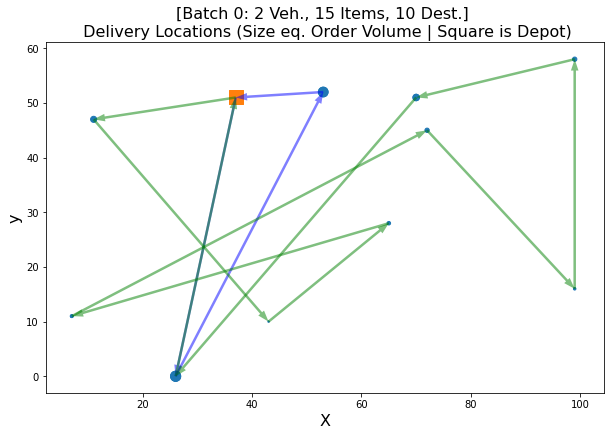

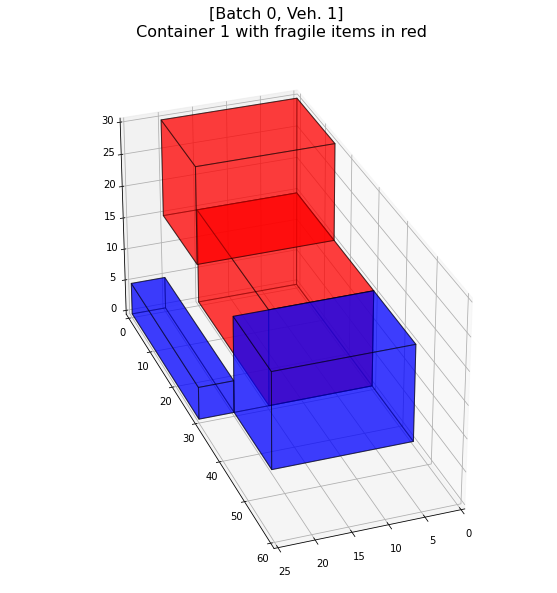

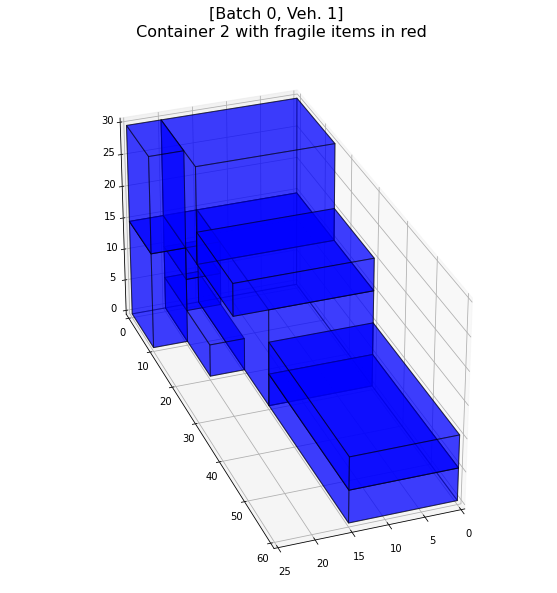

CPU times: user 1.28 s, sys: 109 ms, total: 1.39 s
Wall time: 878 ms


array([[ 0, 13, 12,  6,  8,  0,  7,  3,  2,  4,  9, 15, 10, 11,  5, 14,
         1,  0]])

In [23]:
%%time



# loading a specific model
model_name = str(load_model)
from reinforce_baseline import load_tf_model
from envs.Environment import TDCVRP
import numpy as np

env = TDCVRP(customers, 1, gendreau =gendreau, seed = seed) 

model_t = load_tf_model("src/checkpoints/"+model_name,
                         embedding_dim=128,
                         graph_size=3)
print("Current decode type: {}".format(model_t.decode_type))

while not env.all_finished():
    _,_,env = model_t(env, usage = True) # Change to greedy for usage


trajectory_dist = 0
xys = env.state[0, :, 1:3]
prev_row = xys[0]  # start with depot
for row_i in range(xys.shape[0]):
    row = xys[int(row_i)]
    trajectory_dist -= np.sqrt(np.sum((row - prev_row) ** 2))
    prev_row = row
    
print("Travel Cost: ", -trajectory_dist)
print("Trajectory: ", env.clean_trajectory[0])
print("Missed packages: ", np.sum(env.state[0, :, 16] == 0),"/", np.sum(env.state[0, :, 16] >= 0 ))
env.disp_batch(batch = 0, truck = 0)
env.pandas_state(0)

env.clean_action_list

In [ ]:
#env.make_gif(batch=0, my_title="gend", fps = 3)

In [ ]:
env.pandas_state(0)

In [ ]:
[[100, 200]]*8

In [ ]:
test = np.array([11,11])

In [ ]:
test.size


In [ ]:
int(-1)